In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [ ]:
# Load the dataset
invDf = pd.read_parquet('inventory.parquet', engine='pyarrow')
prodDf = pd.read_parquet('products.parquet', engine='pyarrow')
transDf = pd.read_parquet('transactions.parquet', engine='pyarrow')

In [ ]:
def get_dataset_info(dataset):
  """A method to check for NaN values in our datasets

    Args:
        dataset (DataFrame): dataset to check for NaN values

    Returns:
        boolean: Returns boolean value if NaN values are found returns True otherwise False
    """
  return dataset.info()

for info in [invDf,transDf,prodDf]:
  print(f"{get_dataset_info(info)}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53315 entries, 0 to 53314
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  53315 non-null  int64
 1   color       53315 non-null  int64
 2   week        53315 non-null  int64
 3   year        53315 non-null  int64
 4   end_stock   53315 non-null  int64
dtypes: int64(5)
memory usage: 2.0 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219274 entries, 0 to 1219273
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   transaction_id  1219274 non-null  int64  
 1   date            1219274 non-null  object 
 2   shop            1219274 non-null  int64  
 3   product_id      1219274 non-null  int64  
 4   quantity        1219274 non-null  int64  
 5   price           1219274 non-null  float64
 6   price_paid      1219274 non-null  float64
 7   purchase_price  1219274 non-null  f

In [ ]:
# Convertig date to date time object
transDf['date'] = pd.to_datetime(transDf.date)

In [ ]:
# checking for NaN values in our datasets
def checkNan(dataset):
    """A method to check for NaN values in our datasets

    Args:
        dataset (DataFrame): dataset to check for NaN values

    Returns:
        boolean: Returns boolean value if NaN values are found returns True otherwise False
    """
    return dataset.isnull().values.any()

list(map(lambda x: checkNan(x), [invDf,transDf,prodDf])) # we can see all the data present in the dataset(s) does not have any NaN values

[False, False, False]

In [ ]:
def convert_to_float(dataset):
    """A method to downcast all the values to float64 long variables except date object.

    Args:
        dataset (DataFrame): dataset to convert the colums into float64 values

    Returns:
        DataFrame: Converted dataframe
    """
    for col in dataset.columns:
        if col != 'date' and col != 'year':
            dataset[col] = dataset[col].astype('float64')
    return dataset
    
invDf,transDf,prodDf = (map(lambda x: convert_to_float(x), [invDf,transDf,prodDf]))

In [ ]:
# Check the values of our dataset(s)
transDf.head(3)

,transaction_id,date,shop,product_id,quantity,price,price_paid,purchase_price
0,-4.105354e+18,2018-06-27,3.467809e+18,7.525294e+18,-1.0,-61.969,-54.777,13.764
1,-8.459771e+18,2018-12-08,7.882037e+18,-1.087308e+18,1.0,105.369,105.369,21.111
2,3.140884e+18,2018-06-25,6.203040e+17,4.635203e+18,1.0,124.000,124.000,2.511


In [ ]:
invDf.head(3)

,product_id,color,week,year,end_stock
0,5.013503e+18,2.836256e+17,26.0,2018,467.0
1,5.013503e+18,2.836256e+17,35.0,2018,83.0
2,5.013503e+18,2.836256e+17,37.0,2018,74.0


In [ ]:
prodDf.head(3)

,product_id,color,season,group1,group2,group3,group4,supplier,price
0,-6.621881e+18,-2.483913e+18,-4.346186e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,3.171477e+18,216.845
1,1.419079e+16,4.434393e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845
2,8.497159e+17,-3.276860e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845


### Considering inventory dataset

In [ ]:
# Check number of time series and lengths
print("Number of producuts is {}.".format(len(invDf.groupby(["product_id"]).groups.keys())))
print("Number of color is {}.".format(len(invDf.groupby(["color"]).groups.keys())))
print("Number of time series is {}.".format(len(invDf.groupby(["product_id", "color"]).groups.keys())))
print("\nLength distribution of the time series:")
print(invDf.groupby(["product_id", "color"]).size().describe())

Number of producuts is 744.
Number of color is 193.
Number of time series is 1093.

Length distribution of the time series:
count    1093.000000
mean       48.778591
std        29.186222
min         1.000000
25%        24.000000
50%        48.000000
75%        63.000000
max       104.000000
dtype: float64


In [ ]:
prod_color_count_df = pd.DataFrame({'count' : invDf.groupby(["product_id", "color"] ).size()}).reset_index()

In [ ]:
prod_color_count_df.head(3)

,product_id,color,count
0,-9.205752e+18,-2.120051e+18,2
1,-9.074209e+18,9.836474e+17,22
2,-9.074209e+18,2.585526e+18,22


Text(0.5, 1.0, 'Product count')

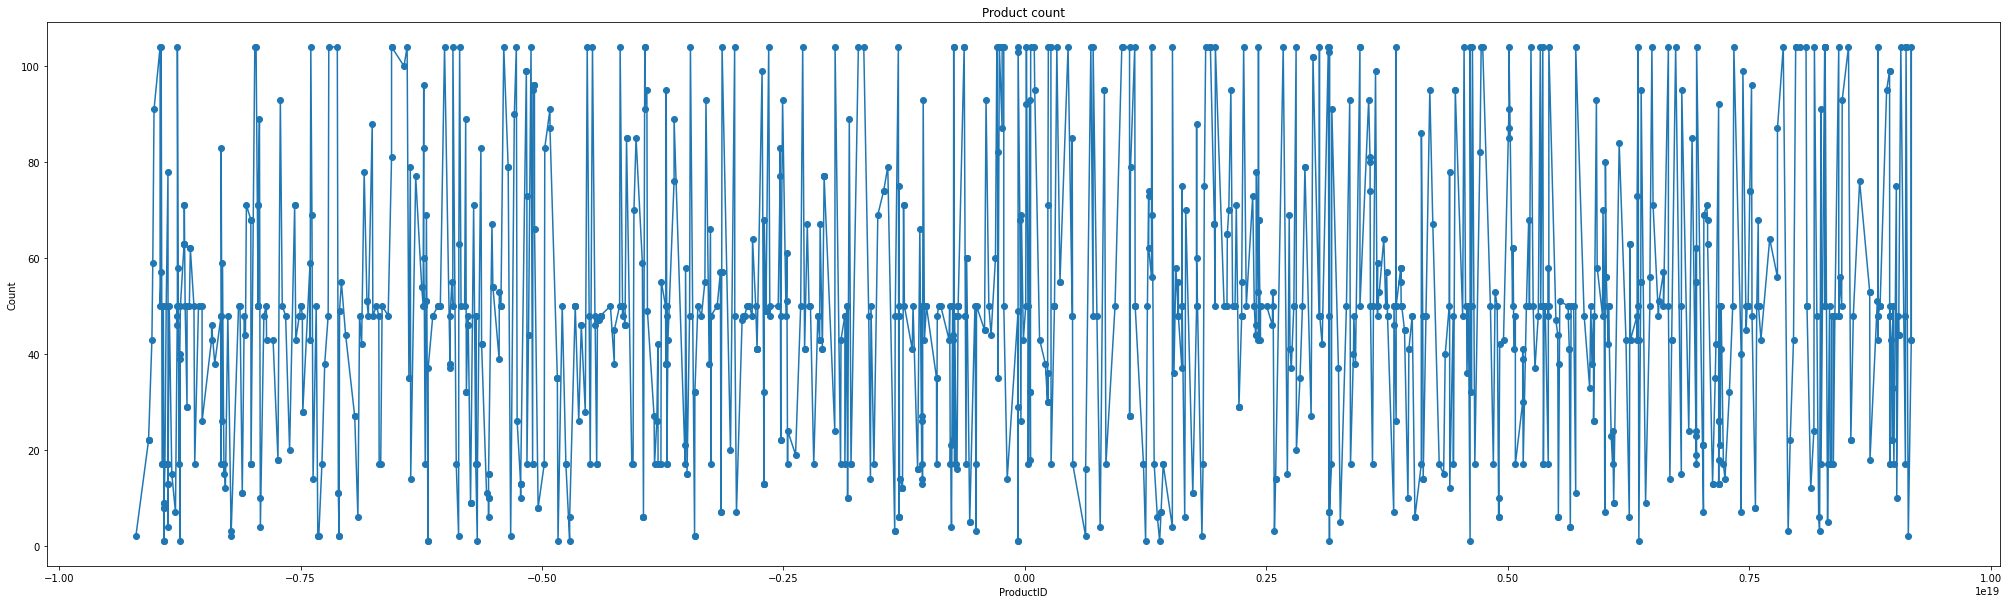

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(prod_color_count_df.product_id,prod_color_count_df['count'],marker='o')
plt.xlabel('ProductID')
plt.ylabel('Count')
plt.title('Product count')

### Ceating a dataframe for total product count based on end stock. This is to see how end stock value per prodcut for two years that is 2018 and 2019.

In [ ]:
prod_endStock_count_df = pd.DataFrame({'count' : invDf.groupby(["product_id", "year"] ).end_stock.size()}).reset_index().sort_values(by=['year'])

In [ ]:
prod_endStock_count_df.head(3)

,product_id,year,count
841,6.352318e+18,2018,52
802,5.656741e+18,2018,50
432,-1.052292e+18,2018,52


In [ ]:
# To fetch the count of end stock at end of the year
# This is a snippet where we just fetch total count of end stock per year (2018,2019)
y1,y2 = 0,0
for idx,val in prod_endStock_count_df.iterrows():
    if val['year'] == 2018: y1+= int(val['count'])
    else: y2+= int(val['count'])

Text(0.5, 1.0, 'Total End Stock per year')

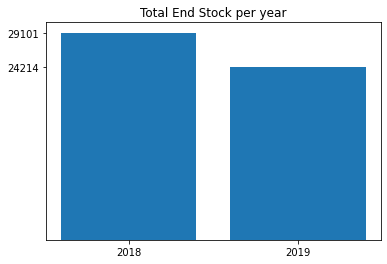

In [ ]:
values = [('2018',y1),('2019',y2)]
labels, val = zip(*values)
xs = np.arange(len(labels)) 

plt.bar(xs, val)
plt.xticks(xs, labels)
plt.yticks(val)
plt.title('Total End Stock per year')

### Gather sales based on the season

- To achive this we join two datasets transaction and product datasets

- The join is based on the productID

**_The main goal is to predict a specific product of a particular season. We can check if that particular product going to increase the price or remains the same during that season._**

In [ ]:
prodDf

,product_id,color,season,group1,group2,group3,group4,supplier,price
0,-6.621881e+18,-2.483913e+18,-4.346186e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,3.171477e+18,216.845
1,1.419079e+16,4.434393e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845
2,8.497159e+17,-3.276860e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845
3,3.436431e+18,-8.748599e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,-3.148163e+18,123.845
4,3.292933e+18,6.300285e+18,-6.688484e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.570611e+18,123.845
...,...,...,...,...,...,...,...,...,...
3719,5.225623e+18,-2.483913e+18,-8.805101e+18,-1.649647e+18,-4.514815e+18,5.270884e+18,-5.181468e+18,-1.218806e+18,139.345
3720,4.433528e+18,1.727990e+18,-8.805101e+18,-1.649647e+18,-4.514815e+18,5.270884e+18,-5.181468e+18,7.946683e+17,154.845
3721,8.538511e+17,-5.638941e+17,-6.688484e+18,-1.649647e+18,-4.514815e+18,5.270884e+18,-5.181468e+18,5.403235e+18,139.345
3722,8.604137e+18,2.495562e+18,5.248912e+18,3.038650e+18,-8.575993e+18,3.346951e+18,-7.589239e+18,-3.148163e+18,108.345


In [ ]:
prodDf.columns.values[-1] = "product_price" # Assuming the price column in the product dataset be product price

In [ ]:
prodDf.head(2)

,product_id,color,season,group1,group2,group3,group4,supplier,product_price
0,-6.621881e+18,-2.483913e+18,-4.346186e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,3.171477e+18,216.845
1,1.419079e+16,4.434393e+18,3.491428e+18,4.412691e+17,-7.584397e+18,-3.541297e+18,-6.020412e+18,8.722432e+18,123.845


In [ ]:
transDf

,transaction_id,date,shop,product_id,quantity,price,price_paid,purchase_price
0,-4.105354e+18,2018-06-27,3.467809e+18,7.525294e+18,-1.0,-61.969,-54.777,13.764
1,-8.459771e+18,2018-12-08,7.882037e+18,-1.087308e+18,1.0,105.369,105.369,21.111
2,3.140884e+18,2018-06-25,6.203040e+17,4.635203e+18,1.0,124.000,124.000,2.511
3,8.293949e+18,2018-05-24,5.882286e+18,3.315728e+17,1.0,37.200,30.318,16.368
4,-3.825516e+17,2019-06-29,3.467809e+18,4.394905e+18,-1.0,-74.400,-74.400,-40.796
...,...,...,...,...,...,...,...,...
1219269,8.207824e+18,2018-05-01,2.584792e+18,-5.838117e+18,1.0,15.500,13.950,46.779
1219270,5.570147e+18,2018-04-29,7.594814e+18,-7.782229e+17,1.0,15.500,15.500,21.390
1219271,3.712099e+18,2018-04-28,6.850805e+18,-7.782229e+17,1.0,15.500,10.850,21.390
1219272,5.773475e+17,2018-04-28,2.584792e+18,-5.838117e+18,1.0,15.500,15.500,46.779


In [ ]:
# Merge the dataset based on the product ID
merge_dataset = pd.merge(prodDf,transDf,on='product_id')

### The transaction dataframe tells us the number of transactions done per product and on a specific date. They also have a purchase price, which tells us the exact price at which the product was bought. The values in the purchase column consist of some negative values. I assume these values are because they returned the product. So when we return the product to the accounts book, they will enter it at a negative value.

In [ ]:
merge_dataset.head(3)

,product_id,color,season,group1,group2,group3,group4,supplier,product_price,transaction_id,date,shop,quantity,price,price_paid,purchase_price
0,8.138509e+18,1.868465e+17,-3.924446e+17,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-9.092260e+18,154.969,-8.374639e+18,2019-06-24,6.747463e+17,1.0,154.969,154.969,40.362
1,-5.933030e+18,-1.530129e+18,6.484470e+18,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-2.948018e+18,123.969,-6.180864e+18,2019-06-28,-1.704741e+17,1.0,46.500,32.550,35.681
2,-5.933030e+18,-1.530129e+18,6.484470e+18,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-2.948018e+18,123.969,-2.166017e+18,2019-06-28,-7.255919e+18,1.0,46.500,46.500,35.681


### We are now analysing the total sales per shop.

In [ ]:
# Grouping the transaction id based on shop
trans_count_based_shop = pd.DataFrame({'count' : merge_dataset.groupby(["transaction_id",'shop'] ).shop.size()}).reset_index()

In [ ]:
trans_count_based_shop

,transaction_id,shop,count
0,-9.223361e+18,3.467809e+18,2
1,-9.223341e+18,3.467809e+18,2
2,-9.223335e+18,5.557508e+18,2
3,-9.223332e+18,-2.605118e+18,4
4,-9.223301e+18,5.557508e+18,8
...,...,...,...
979763,9.223282e+18,3.467809e+18,1
979764,9.223300e+18,5.557508e+18,1
979765,9.223305e+18,5.557508e+18,3
979766,9.223308e+18,5.557508e+18,3


### After grouping the dataframe based on the transaction id and shop we are now fetching total sales from above dataframe.

In [ ]:
tot_trans_per_shop = pd.DataFrame({'Total' : trans_count_based_shop.groupby('shop')['count'].apply(sum)}).reset_index()

In [ ]:
tot_trans_per_shop

,shop,Total
0,-8.626987e+18,10503
1,-8.576863e+18,10044
2,-8.461798e+18,7925
3,-8.405650e+18,1080
4,-8.276772e+18,9151
...,...,...
115,8.110360e+18,10197
116,8.386272e+18,5450
117,8.543104e+18,3736
118,8.887709e+18,9265


#### Since we have 120 unique shops, we are encoding them with different labels. This is done to provide legible values while plotting.

**_We are using the label encoder from Sklearn to encode the shop id._**

So what is this **_Label Encoding_** ?

_Label Encoding is a well-known encoding technique for dealing with categorical information. Based on alphabetical sorting, each label is issued a unique integer in this approach._

Why we use **_Label Encoding_** ?

_To normalize labels, we use LabelEncoder. It may also be used to convert non-numerical labels to numerical labels (as long as they are hashable and comparable)._

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # Label encoder constructor

In [ ]:
# label encoding the shop id since we dont want to display the shop id as float 64 format
tot_trans_per_shop.shop = list(le.fit_transform(tot_trans_per_shop.shop))

In [ ]:
shop_mapping = dict(zip(le.transform(le.classes_),le.classes_)) # a dict to keep track of all our shops

In [ ]:
fig = px.bar(tot_trans_per_shop,x="shop", y="Total",title="Total Transaction per Shop (2018-2019)")
fig.update_xaxes(type='category')

### From the above graoh we can say that shop *__number 95__* makes the best sales with *__923.778k__*. This is calculated based on the transaction id.

In [ ]:
tot_trans_per_shop

,shop,Total
0,0,10503
1,1,10044
2,2,7925
3,3,1080
4,4,9151
...,...,...
115,115,10197
116,116,5450
117,117,3736
118,118,9265


#### From the above dataframe we are selecting the top 5 shops for sales between 2018 and 2019.

In [ ]:
top_five_shops = pd.DataFrame.from_dict(tot_trans_per_shop.Total.nlargest(5).to_dict(),orient='index',columns=['total'])
top_five_shops['shops'] = top_five_shops.index
top_five_shops

,total,shops
95,923778,95
84,738841,84
32,68804,32
47,48540,47
14,26512,14


In [ ]:
fig = px.bar(top_five_shops, x='shops', y='total',title='Top 5 shops sales')
fig.update_xaxes(type='category')

In [ ]:
merge_dataset.head(2)

,product_id,color,season,group1,group2,group3,group4,supplier,product_price,transaction_id,date,shop,quantity,price,price_paid,purchase_price
0,8.138509e+18,1.868465e+17,-3.924446e+17,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-9.092260e+18,154.969,-8.374639e+18,2019-06-24,6.747463e+17,1.0,154.969,154.969,40.362
1,-5.933030e+18,-1.530129e+18,6.484470e+18,1.510276e+18,-7.584397e+18,-3.541297e+18,-6.020412e+18,-2.948018e+18,123.969,-6.180864e+18,2019-06-28,-1.704741e+17,1.0,46.500,32.550,35.681


### In the above cell, we saw the best sales value per shop based on transaction id. It is bad if we don't analyse the top products for each shop. 
### So now we are grouping the dataset based on shop and product ID. First it groups based on the shop and then for each shop fetches the product id count. Later, we group the shop and total count. In a later stage, we will group the dataframe based on the product_id and total count.By doing this we can get per shop total count of products sales.

In [ ]:
merge_dataset.groupby(['shop','product_id'] ).product_id.count()

shop           product_id   
-8.626987e+18  -9.074209e+18    120
               -9.017388e+18     10
               -8.954581e+18     12
               -8.943598e+18      4
               -8.872920e+18     22
                               ... 
 9.187231e+18   8.984835e+18     12
                8.990690e+18      8
                9.024998e+18     24
                9.048865e+18    108
                9.179841e+18      6
Name: product_id, Length: 33652, dtype: int64

### Fetching total product id count based on shop

In [ ]:
# Fetching top product based on the shop with their total count of sales
top_shop_with_prod = pd.DataFrame({'Total' : merge_dataset.groupby(['shop','product_id'] ).product_id.count()}).reset_index()

In [ ]:
top_shop_with_prod

,shop,product_id,Total
0,-8626986901351661716,-9074209224160942174,120
1,-8626986901351661716,-9017388189627659561,10
2,-8626986901351661716,-8954581174750102614,12
3,-8626986901351661716,-8943598278812035099,4
4,-8626986901351661716,-8872920207719896125,22
...,...,...,...
33647,9187231284112326142,8984834717882062662,12
33648,9187231284112326142,8990690314745719445,8
33649,9187231284112326142,9024997705245660970,24
33650,9187231284112326142,9048864622267009556,108


In [ ]:
# Grouping the dataframe based on the shop and total count
topShopCount = top_shop_with_prod.loc[top_shop_with_prod.groupby('shop')['Total'].idxmax()]

In [ ]:
# Grouping the dataframe based on the prodcut_id and total count
topProduct = topShopCount.loc[topShopCount.groupby('product_id')['Total'].idxmax()]
topProduct

,shop,product_id,Total
28935,6793189092950697763,-6224672154067568199,1320
15899,-829589175259629768,-4047784983099601757,87
5208,-6577573088110841878,-2772813689426000972,216
21019,1905007992063171411,-2078421395032025400,248
27074,5557508358505503075,-1059965484574044448,72368
16678,-170474117979930909,307038357604793420,2988
19429,1125480561946486031,1282825973904214606,108
1518,-8046555554859176587,5013503333822849619,228
9429,-3887730515161849850,7185385798013345637,17584


### So from this we are going to consider the top prodcut for 9 stores. This is done with the help of inbuilt pandas function called *_idxmax()_*.

#### This idxmax returns the first occurrence of maximum over requested axis.


##### NOTE: We are also encoding the shop and prodict id so we are storing their values in a dictionary format where the keys is label encoded value and value is the float64 value.

In [ ]:
topProduct.shop = le.fit_transform(topProduct.shop)
top_prod_shop_mapping = dict(zip(le.transform(le.classes_),le.classes_)) # a dict to keep track of all our shops

topProduct.product_id = le.fit_transform(topProduct.product_id)
top_prod_prdId_mapping = dict(zip(le.transform(le.classes_),le.classes_)) # a dict to keep track of all our product ID

In [ ]:
topProduct

,shop,product_id,Total
28935,8,0,1320
15899,3,1,87
5208,1,2,216
21019,6,3,248
27074,7,4,72368
16678,4,5,2988
19429,5,6,108
1518,0,7,228
9429,2,8,17584


In [ ]:
plt.figure(figsize=(10,5))
fig = px.bar(topProduct,x="shop", y="product_id",color='Total',title="Top product sales for top 9 shops")
fig.update_xaxes(type='category')

<Figure size 720x360 with 0 Axes>

#### From the above graph we can say shop number 7 and product number 4 has maximum sales.

In [ ]:
shop_no = top_prod_shop_mapping[7]
prod_no = top_prod_prdId_mapping[4]
f"{shop_no} shop id has maximum sales for product id {prod_no}"

'5557508358505503075 shop id has maximum sales for product id -1059965484574044448'

### The goal of the upcoming cells are to fetch top prodcuts based on season

In [ ]:
# Grouping the dataset based on season and product id. This tells us for every season, number of product sold
merge_dataset.groupby(['season','product_id'] ).product_id.count()

season                product_id          
-6760223102208120763  -2143490386583648322        2
                       1396243425893053337        2
                       1589665821829795086       12
-6102843113218597488  -9074209224160942174    26685
                      -8833517046428902133     1708
                                              ...  
 6484470284795305987   7622760281915042866     2776
                       8749151511271642982     8898
                       8827991019345250855     2826
                       8972049865264902014     3243
                       9048864622267009556    27255
Name: product_id, Length: 488, dtype: int64

In [ ]:
# Creating the dataframe for count of product per season
top_prod_season = pd.DataFrame({'Total' : merge_dataset.groupby(['season','product_id'] ).product_id.count()}).reset_index()

In [ ]:
top_prod_season

,season,product_id,Total
0,-6760223102208120763,-2143490386583648322,2
1,-6760223102208120763,1396243425893053337,2
2,-6760223102208120763,1589665821829795086,12
3,-6102843113218597488,-9074209224160942174,26685
4,-6102843113218597488,-8833517046428902133,1708
...,...,...,...
483,6484470284795305987,7622760281915042866,2776
484,6484470284795305987,8749151511271642982,8898
485,6484470284795305987,8827991019345250855,2826
486,6484470284795305987,8972049865264902014,3243


In [ ]:
# Grouping the dataframe based on the season and total count which has the maximum value
topSeasonCount = top_prod_season.loc[top_prod_season.groupby('season')['Total'].idxmax()]

In [ ]:
# Grouping the dataframe based on the product_id and total count
top_prd_per_season = topSeasonCount.loc[topSeasonCount.groupby('product_id')['Total'].idxmax()]

In [ ]:
top_prd_per_season.season = le.fit_transform(top_prd_per_season.season)
topProd_season = dict(zip(le.transform(le.classes_),le.classes_)) # a dict to keep track of all our seasons

top_prd_per_season.product_id = le.fit_transform(top_prd_per_season.product_id)
topProd_seasonProdId = dict(zip(le.transform(le.classes_),le.classes_)) # a dict to keep track of all our prodId per season

In [ ]:
top_prd_per_season

,season,product_id,Total
81,2,0,1
233,6,1,16
324,9,2,343
429,12,3,49648
107,3,4,67592
40,1,5,200464
184,4,6,37548
2,0,7,12
376,11,8,402
317,8,9,5


In [ ]:
plt.figure(figsize=(10,5))
fig = px.bar(top_prd_per_season,x="product_id", y="season",color='Total',title="Top 9 product sales for top 13 shops based on season")
fig.update_xaxes(type='category')

<Figure size 720x360 with 0 Axes>

### From the above graph, we can say that product id 5 has the maximum sales at season 1 with value of 200k.

In [ ]:
season = topProd_season[1]
pId = topProd_seasonProdId[5]
(season,pId)

(-6102843113218597488, -1059965484574044448)

### Creating the dataframe for our forecasting algorithm From the insights from the above cells, we are filtering the merged dataset. First we are going to predict some random product id of our own choice, and then we are going to predict the top product and second top product.

In [ ]:
# Considering random product id "-6.224672154067569e+18"
randomProductDf = merge_dataset[merge_dataset.product_id == -6.224672154067569e+18]

In [ ]:
randomProductDf.head(2)

,product_id,color,season,group1,group2,group3,group4,supplier,price_x,transaction_id,date,shop,quantity,price_y,price_paid,purchase_price
1324459,-6224672154067568199,1925120380389431445,-392444553165679582,5864543912459585581,-941078234227893370,-3541297049376649409,-6020411590809505277,-2617515867788975000,77.469,2472018448901023765,2018-05-21,-6005758547740849838,-1,-61.969,-61.969,-21.824
1324460,-6224672154067568199,1925120380389431445,-392444553165679582,5864543912459585581,-941078234227893370,-3541297049376649409,-6020411590809505277,-2617515867788975000,77.469,4229117551775125907,2018-05-22,-6111851303365417903,-1,-61.969,-61.969,-21.824


In [ ]:
def fetchUnique(dataset):
    """A function removes the column with unique value count as 1. 

    Args:
        dataset (DataFrame): A dataset

    Returns:
        DataFrame: Cleaned dataset
    """
    print(f"Dataset shape before removing unwanted columns is {dataset.shape}")
    for cols in dataset.columns:
        if dataset[cols].nunique() == 1 and cols != 'product_id':
            dataset.drop(cols,inplace=True,axis=1)
    return dataset

#### Reason we are removing the single unique values columns because they don't really contain information, but they consume a lot of space in the list of columns and make it hard to get around - so I'd like to hide them, remove them, convert them to table.

In [ ]:
randomProductDf = fetchUnique(randomProductDf)
print(f"Dataset shape after removing unwanted columns is {randomProductDf.shape}")

Dataset shape before removing unwanted columns is (49317, 16)
Dataset shape after removing unwanted columns is (49317, 9)


In [ ]:
randomProductDf

,product_id,color,transaction_id,date,shop,quantity,price_y,price_paid,purchase_price
1324459,-6224672154067568199,1925120380389431445,2472018448901023765,2018-05-21,-6005758547740849838,-1,-61.969,-61.969,-21.824
1324460,-6224672154067568199,1925120380389431445,4229117551775125907,2018-05-22,-6111851303365417903,-1,-61.969,-61.969,-21.824
1324461,-6224672154067568199,1925120380389431445,8751697194189238408,2018-05-23,3467808910252980446,-1,-61.969,-61.969,-21.824
1324462,-6224672154067568199,1925120380389431445,952323573642207269,2018-05-23,-2605118369234351713,-1,-61.969,-61.969,-21.824
1324463,-6224672154067568199,1925120380389431445,3404148851523764153,2018-05-23,9187231284112326142,-1,-61.969,-61.969,-21.824
...,...,...,...,...,...,...,...,...,...
1373771,-6224672154067568199,-1530128800225508834,-5454908070420616134,2018-08-21,3467808910252980446,-1,-77.469,-77.469,-23.560
1373772,-6224672154067568199,-1530128800225508834,9089888667846400182,2018-08-20,3467808910252980446,-1,-77.469,-77.469,-23.560
1373773,-6224672154067568199,-1530128800225508834,1842575060291058089,2018-08-21,3467808910252980446,-1,-77.469,-77.469,-23.560
1373774,-6224672154067568199,-1530128800225508834,-2517976997250701129,2018-08-27,3467808910252980446,-1,-77.469,-77.469,-23.560


### Using Facebook prophet algorithm for forecasting.

So what is this *_Prophet_* algorithm?

It is a forecasting model-building technique for time series data. In contrast to the usual technique, it attempts to fit additive regression models, sometimes known as curve fitting.

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
def quantityPredictDemand(dataset,type=None):
  df = None
  m = Prophet(weekly_seasonality = True,yearly_seasonality= True)
  if type == 'demand':
    # Data creation for our algorithm. This takes the date as a feature and price as target class.
    df = dataset[['date','quantity']]
    # renaming the columns
    df.columns = ['ds','y']
  else:
    df = dataset[['date','purchase_price']]
    # renaming the columns
    df.columns = ['ds','y']
  
  # Fiting our model
  m.fit(df)
  future = m.make_future_dataframe(periods=730)
  forecast = m.predict(future)
  forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
  
  return m, forecast

In [ ]:
m, forecast = quantityPredictDemand(randomProductDf,'demand')
plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### The below graph plots the trend and seasonality of the product. From the trend graph, we can say that from July 2020 there will be a steady increase in the price of this product. In comparison with the previous years, we can say that the product in the upcoming year could be a hit product.


#### The graph below shows the seasonality graph of a product. Here we are checking it weekly. From the graph we can say that sales for this product are high during Sundays, with an increase in product sales of 6.8 per day, and the next best day is Saturday, with a value of 2.7 increase in sales of this product.


In [ ]:
m, forecast = quantityPredictDemand(randomProductDf)
plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Likewise we are considering the top product now for forecasting.

In [ ]:
TopProductDf = merge_dataset[merge_dataset.product_id == pId]

In [ ]:
TopProductDf

,product_id,color,season,group1,group2,group3,group4,supplier,price_x,transaction_id,date,shop,quantity,price_y,price_paid,purchase_price
469503,-1059965484574044448,4312691622919699641,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,3736551833233568595,2019-09-18,5557508358505503075,-1,-137.361,-137.361,-40.238
469504,-1059965484574044448,4312691622919699641,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,-8819145345220355681,2019-09-17,5557508358505503075,-1,-142.879,-142.879,-40.238
469505,-1059965484574044448,4312691622919699641,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,-4708175706360374185,2019-09-17,5557508358505503075,-1,-142.073,-142.073,-40.238
469506,-1059965484574044448,4312691622919699641,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,856344441628481862,2019-09-17,5557508358505503075,-1,-135.594,-135.594,-40.238
469507,-1059965484574044448,4312691622919699641,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,3715661808491069439,2019-09-17,5557508358505503075,-1,-135.594,-135.594,-40.238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669962,-1059965484574044448,1813132904556823399,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,6540003617103449564,2019-12-31,5557508358505503075,-1,-154.969,-154.969,-40.238
669963,-1059965484574044448,1813132904556823399,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,-5937228682520210591,2019-12-30,5557508358505503075,-1,-154.969,-154.969,-40.238
669964,-1059965484574044448,1813132904556823399,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,-3658493126877307260,2019-12-30,5557508358505503075,-1,-154.969,-154.969,-40.238
669965,-1059965484574044448,1813132904556823399,-6102843113218597488,1510276081875646449,-7584397099425324432,-3541297049376649409,-6020411590809505277,-2948017505948333945,154.969,-5742615362916566606,2019-12-30,5557508358505503075,-1,-154.969,-154.969,-40.238


In [ ]:
TopProductDf = fetchUnique(TopProductDf)

Dataset shape before removing unwanted columns is (200464, 16)


In [ ]:
TopProductDf

,product_id,color,transaction_id,date,shop,quantity,price_y,price_paid,purchase_price
469503,-1059965484574044448,4312691622919699641,3736551833233568595,2019-09-18,5557508358505503075,-1,-137.361,-137.361,-40.238
469504,-1059965484574044448,4312691622919699641,-8819145345220355681,2019-09-17,5557508358505503075,-1,-142.879,-142.879,-40.238
469505,-1059965484574044448,4312691622919699641,-4708175706360374185,2019-09-17,5557508358505503075,-1,-142.073,-142.073,-40.238
469506,-1059965484574044448,4312691622919699641,856344441628481862,2019-09-17,5557508358505503075,-1,-135.594,-135.594,-40.238
469507,-1059965484574044448,4312691622919699641,3715661808491069439,2019-09-17,5557508358505503075,-1,-135.594,-135.594,-40.238
...,...,...,...,...,...,...,...,...,...
669962,-1059965484574044448,1813132904556823399,6540003617103449564,2019-12-31,5557508358505503075,-1,-154.969,-154.969,-40.238
669963,-1059965484574044448,1813132904556823399,-5937228682520210591,2019-12-30,5557508358505503075,-1,-154.969,-154.969,-40.238
669964,-1059965484574044448,1813132904556823399,-3658493126877307260,2019-12-30,5557508358505503075,-1,-154.969,-154.969,-40.238
669965,-1059965484574044448,1813132904556823399,-5742615362916566606,2019-12-30,5557508358505503075,-1,-154.969,-154.969,-40.238


In [ ]:
m, forecast = quantityPredictDemand(TopProductDf,'demand')
plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### From two product analysis we can say that the cost increase for randomly tested product but as of the next product id that is the top product id we can say that there is a slight inrease in price over the year but as of the sales per week top prodcut has outlast the randomly selected product id with 18.4 on Sundays and 11.5 on Saturdays.

In [ ]:
m, forecast = quantityPredictDemand(TopProductDf)
plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Implementing the same usecase with LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(101)

In [ ]:
data = randomProductDf[['date','purchase_price']]

In [ ]:
data.purchase_price = data.purchase_price.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dff = scaler.fit_transform(np.array(data['purchase_price']).reshape(-1,1))

In [ ]:
training_size = int(len(dff)*0.75)
test_size = len(dff)-training_size
train_data,test_data = dff[0:training_size,:],dff[training_size:len(dff),:1]

In [ ]:
(training_size,test_size)

(36987, 12330)

In [ ]:
def create_dataset(dataset, time_step=1):
	"""A method to create a dataset for training and testing purpose

    Args:
        dataset (DataFrame): dataset to split into train and test values

    Returns:
        tuple: A tuple which returns numpy array of X and Y datapoints
    """
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# Change the value of time step for larger time range
X_train, Y_train = create_dataset(train_data, 10)
X_test, Y_test = create_dataset(test_data, 10)

In [ ]:
# Reshaping input to [samples, time steps, features] required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
#  Build the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(rate = 0.2))

##add 2nd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 1))

## Model fitting
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x = X_train, y = Y_train, batch_size = 32, epochs = 20)

Epoch 1/20
1156/1156 [==============================] - 31s 19ms/step - loss: 0.0052
Epoch 2/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0026
Epoch 3/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0019
Epoch 4/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0016
Epoch 5/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0015
Epoch 6/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0014
Epoch 7/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0013
Epoch 8/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0012
Epoch 9/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0012
Epoch 10/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0012
Epoch 11/20
1156/1156 [==============================] - 22s 19ms/step - loss: 0.0012
Epoch 12/20
1156/1156 [==============================] - 22s 19

In [ ]:
# Lets predict now and check performance metrics
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

#### With the help of a LSTM model we predicted the proce range of a prodcut we can say that there is no increase in the price.

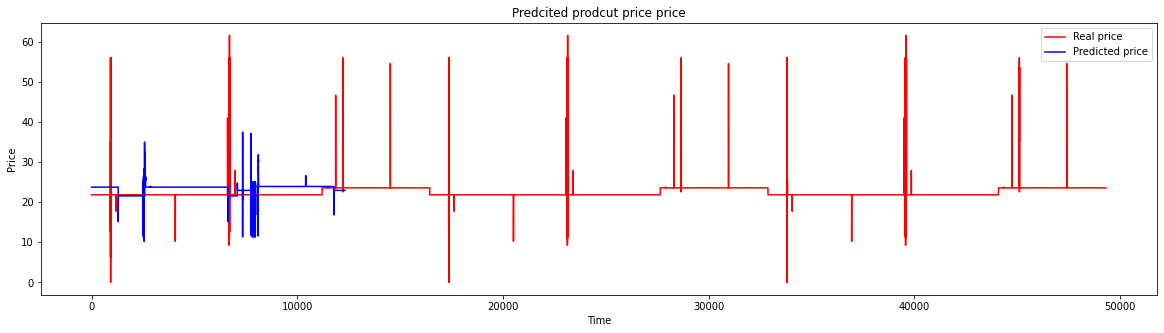

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(abs(data.purchase_price.values), color = 'red', label = 'Real price')
plt.plot(abs(predicted_stock_price), color = 'blue', label = 'Predicted price')
plt.title('Predcited prodcut price price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

### We can say that Facebooks prophet algorithm, performs better but in theory LSTM based model should be better option. The reason why LSTM model is not performing as it should becuse we have defined the timestep as 10 so it fetches timestep of 10 values only.



#### If given more time, I would implement a recommendation system. This recommendation system considers the product, season, and transaction. Based on these criteria, we can also predict this product is best for this season. This can be achieved by using an unsupervised machine learning algorithm along with the product content. Since we have the product and the most up-to-date use case for fashion retail, we can fetch all the information about the product from their website. Along with NLP techniques, we can use Latent Semantic Analysis for recommender systems.